Skeleton code for k-means clustering mini-project.

In [34]:
import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
%matplotlib inline

In [35]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

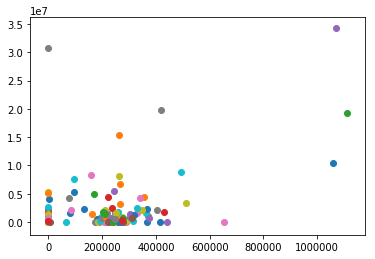

In [36]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)

### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

In [37]:
### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

from sklearn.cluster import KMeans
# (n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')

def get_kmeans_classifier(features, n_clusters, **kwargs):
    clf = KMeans(2)
    clf.fit(features)

    labels = clf.labels_

    pred = clf.predict(features)
    
    return (clf, pred, labels)

In [38]:
clf, pred, _ = get_kmeans_classifier(finance_features, 2)

In [39]:
### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
def draw_cluster(pred, features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2):
    try:
        Draw(pred, features, poi=poi, mark_poi=mark_poi, name=name, f1_name=f1_name, f2_name=f2_name)
    except NameError:
        print "no predictions object named pred found, no clusters to plot"

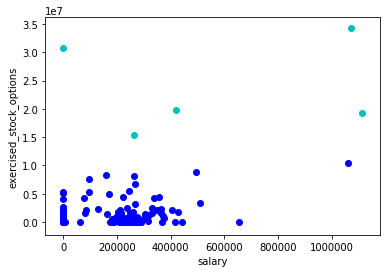

In [40]:
draw_cluster(pred, finance_features, poi)

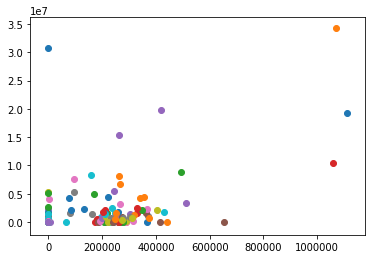

In [41]:
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2, _ in finance_features:
    plt.scatter( f1, f2 )
plt.show()

In [43]:
clf, pred, _ = get_kmeans_classifier(finance_features, 3)

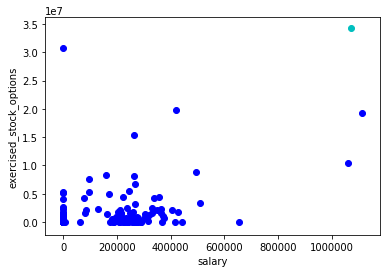

In [44]:
draw_cluster(pred, finance_features, poi)

In [60]:
def get_max_min_by_col(data_dict, col):
    _min = float("inf")
    _max = float("-inf")

    for name, value in data_dict.iteritems():
        if type(value[col]) != float and type(value[col]) != int: 
            continue

        if value[col] < _min:
            _min = value[col]

        if value[col] > _max:
            _max = value[col]

    return _min, _max

In [61]:
_min, _max = get_max_min_by_col(data_dict, "exercised_stock_options")
print _min, _max

3285 34348384


In [63]:
_min, _max = get_max_min_by_col(data_dict, "salary")
print _min, _max

477 1111258
